# Kenyan Protest Data Story

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [16]:
# Style template
# Colours
MAIN_RED = '#c0392b'    
MAIN_GREEN = '#27ae60'   
NEUTRAL_GREY = '#a9a9a9' 
LIGHT_GREY = '#d3d3d3'

# Font style
plt.rc('font', family='sans-serif')
sns.set_style("white")

In [17]:
# Load data
raw_data = pd.read_csv("data/ACLED_Data_2025-10-23.csv")

# Output file
output_file = "data/EA_data_clean.csv"

# Countries
countries_list = ['Kenya', 'Uganda', 'Tanzania', 'Ethiopia', 'Somalia']
keep_columns = ['event_id_cnty',  
    'event_date',     
    'year',           
    'country',        
    'admin1',         
    'sub_event_type',
    'fatalities',   
    'notes']
df_clean_columns = raw_data.loc[
  (raw_data['event_type'] == 'Protests') &
  (raw_data['country'].isin(countries_list)),
  keep_columns].copy()
df_clean_columns

df_clean_columns.to_csv(output_file, index=False)

In [18]:
df_protests = pd.read_csv('data/EA_data_clean.csv')
df_protests.head()

,event_id_cnty,event_date,year,country,admin1,sub_event_type,fatalities,notes
0,KEN4,1997-01-25,1997,Kenya,Nakuru,Peaceful protest,0,Roman Catholic Church leaders protest the poli...
1,KEN11,1997-02-25,1997,Kenya,Nairobi,Peaceful protest,0,Third day of students protesting after death o...
2,KEN12,1997-02-26,1997,Kenya,Nairobi,Protest with intervention,0,Kenya Polytechnic students protested the death...
3,ETH4,1997-03-21,1997,Ethiopia,Addis Ababa,Excessive force against protesters,0,Students stage demonstration; security forces ...
4,ETH5,1997-03-30,1997,Ethiopia,Addis Ababa,Peaceful protest,0,Opposition groups stage protest over land redi...


In [19]:
# Convert event column to date time object
df_protests['event_date'] = pd.to_datetime(df_protests['event_date'])

# Make event index
df_protests.set_index('event_date', inplace = True)
df_protests.head()

,event_id_cnty,year,country,admin1,sub_event_type,fatalities,notes
event_date,,,,,,,
1997-01-25,KEN4,1997,Kenya,Nakuru,Peaceful protest,0,Roman Catholic Church leaders protest the poli...
1997-02-25,KEN11,1997,Kenya,Nairobi,Peaceful protest,0,Third day of students protesting after death o...
1997-02-26,KEN12,1997,Kenya,Nairobi,Protest with intervention,0,Kenya Polytechnic students protested the death...
1997-03-21,ETH4,1997,Ethiopia,Addis Ababa,Excessive force against protesters,0,Students stage demonstration; security forces ...
1997-03-30,ETH5,1997,Ethiopia,Addis Ababa,Peaceful protest,0,Opposition groups stage protest over land redi...


In [20]:
# Kenya data only
df_kenya = df_protests[df_protests['country']=='Kenya'].copy()
df_kenya.head()

,event_id_cnty,year,country,admin1,sub_event_type,fatalities,notes
event_date,,,,,,,
1997-01-25,KEN4,1997,Kenya,Nakuru,Peaceful protest,0,Roman Catholic Church leaders protest the poli...
1997-02-25,KEN11,1997,Kenya,Nairobi,Peaceful protest,0,Third day of students protesting after death o...
1997-02-26,KEN12,1997,Kenya,Nairobi,Protest with intervention,0,Kenya Polytechnic students protested the death...
1997-04-14,KEN22,1997,Kenya,Kitui,Protest with intervention,0,200 protesters in support of NARC MP Charity N...
1997-04-18,KEN24,1997,Kenya,Nairobi,Peaceful protest,0,Street hawkers gather at Nairobi city council ...


In [21]:
df_kenya['fatalities'] = df_kenya['fatalities'].fillna(0)


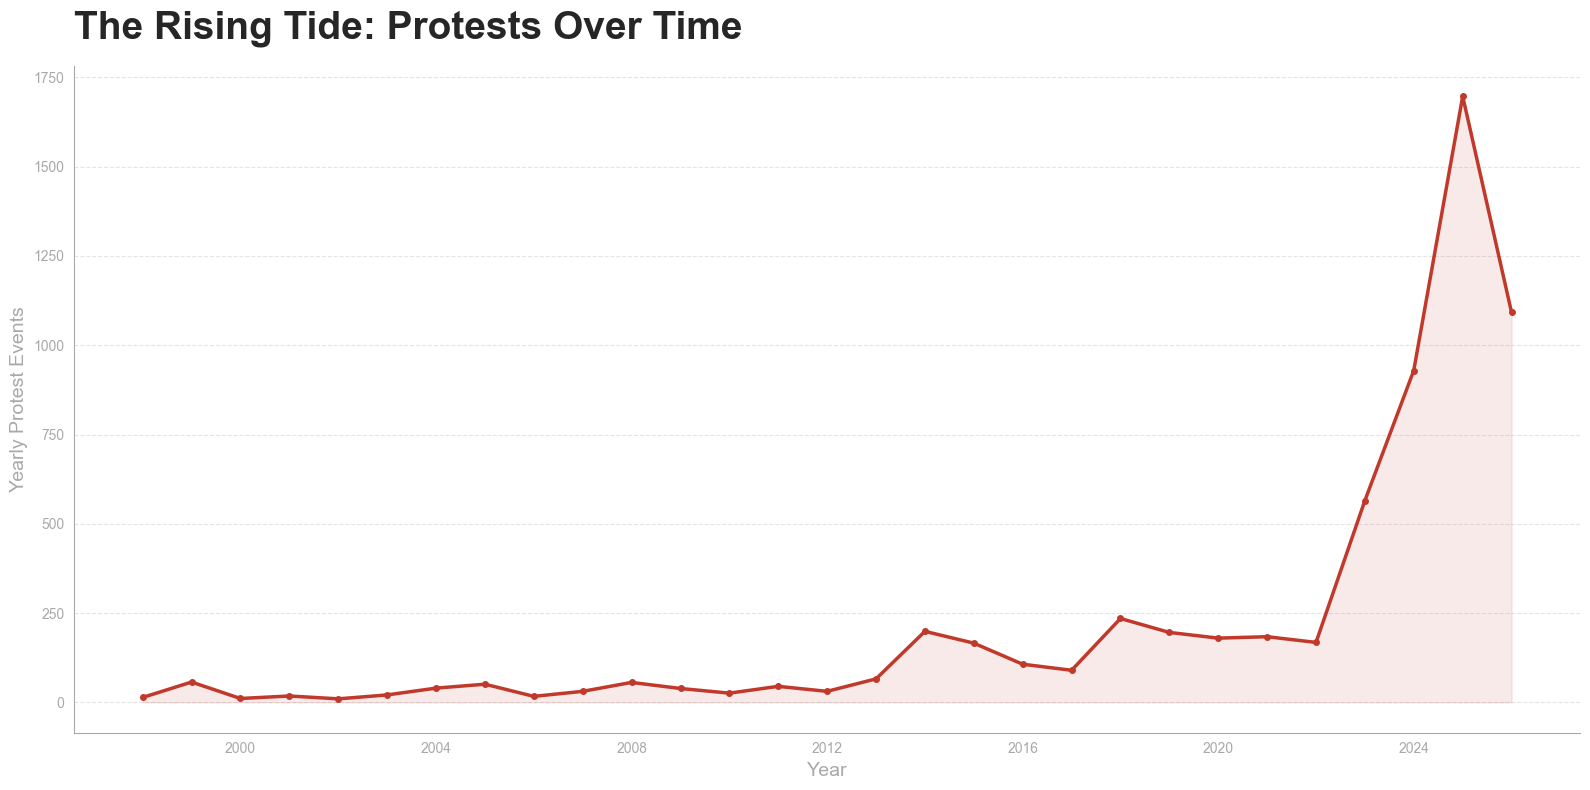

In [22]:
# Data aggregation
quarterly_protests = df_kenya.resample('YE')['event_id_cnty'].count()

# Plot
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(quarterly_protests.index, quarterly_protests.values, 
        color=MAIN_RED, 
        lw=2.5, 
        marker='o', 
        markersize=4)

# gradient
ax.fill_between(quarterly_protests.index, quarterly_protests.values, 
                color=MAIN_RED, 
                alpha=0.1)

# Styling
ax.set_title("The Rising Tide: Protests Over Time", 
             fontsize=28, fontweight='bold', loc='left', pad=20)
ax.grid(axis='y', linestyle='--', alpha=0.6, color=LIGHT_GREY)
ax.set_xlabel("Year", fontsize=14, color=NEUTRAL_GREY)
ax.set_ylabel("Yearly Protest Events", fontsize=14, color=NEUTRAL_GREY)

sns.despine(ax=ax)
ax.spines['bottom'].set_color(NEUTRAL_GREY)
ax.spines['left'].set_color(NEUTRAL_GREY)
ax.tick_params(colors=NEUTRAL_GREY)

plt.tight_layout()
plt.savefig('graph1_monthly.png', dpi=300, bbox_inches='tight')
plt.show()

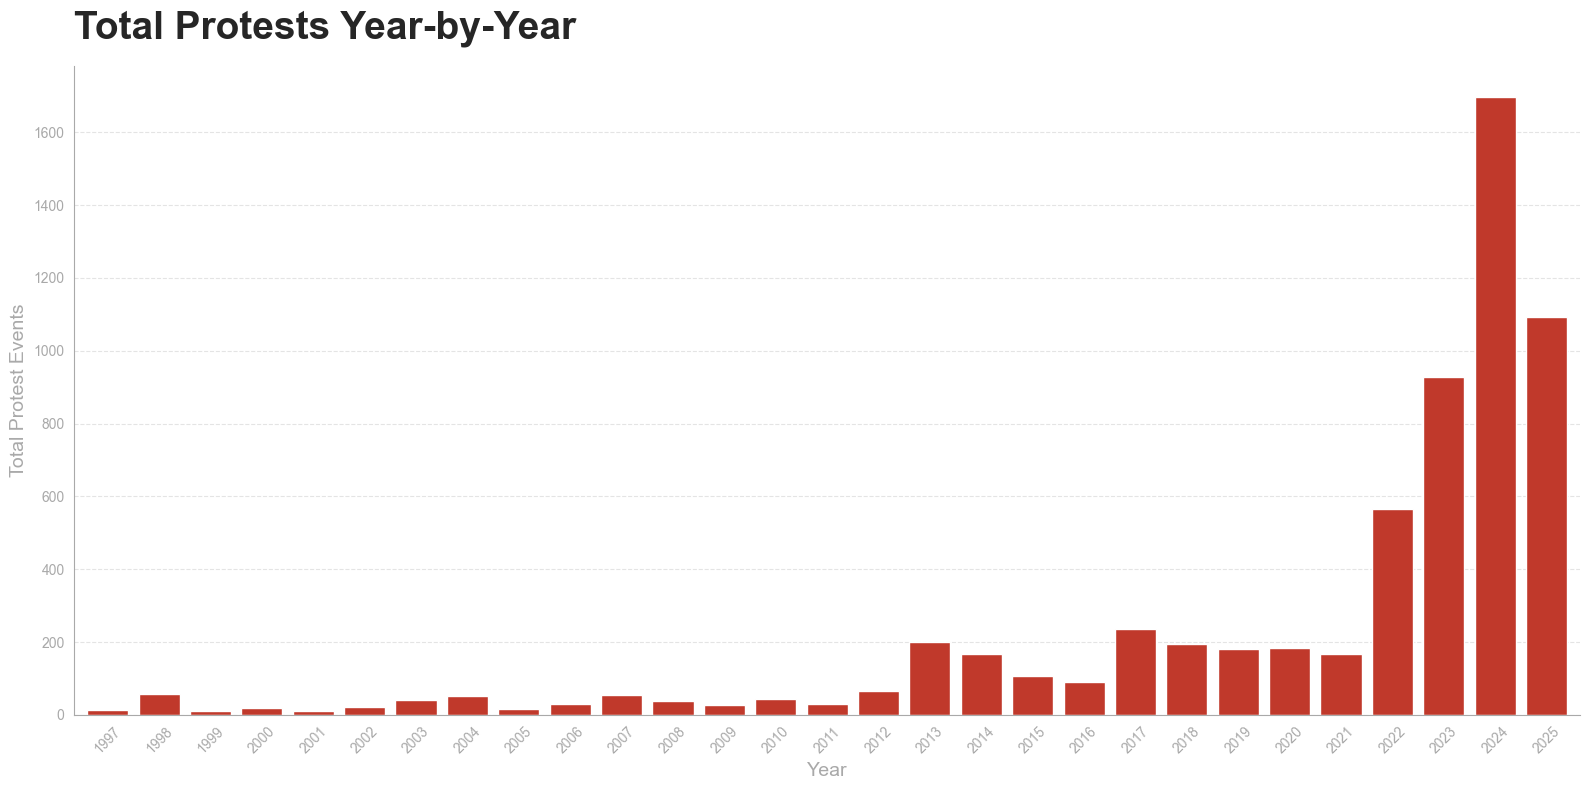

In [23]:
#Data Aggregation
yearly_protests = df_kenya.groupby('year')['event_id_cnty'].count()

#Plot
fig, ax = plt.subplots(figsize=(16, 8))
yearly_protests.plot(kind='bar', ax=ax, color=MAIN_RED, width=0.8)

# Styling
ax.set_title("Total Protests Year-by-Year", 
             fontsize=28, fontweight='bold', loc='left', pad=20)
ax.grid(axis='y', linestyle='--', alpha=0.6, color=LIGHT_GREY)
ax.set_xlabel("Year", fontsize=14, color=NEUTRAL_GREY)
ax.set_ylabel("Total Protest Events", fontsize=14, color=NEUTRAL_GREY)

plt.xticks(rotation=45)
sns.despine(ax=ax)
ax.spines['bottom'].set_color(NEUTRAL_GREY)
ax.spines['left'].set_color(NEUTRAL_GREY)
ax.tick_params(colors=NEUTRAL_GREY)

plt.tight_layout()
plt.savefig('graph2_yearly.png', dpi=300, bbox_inches='tight')
plt.show()

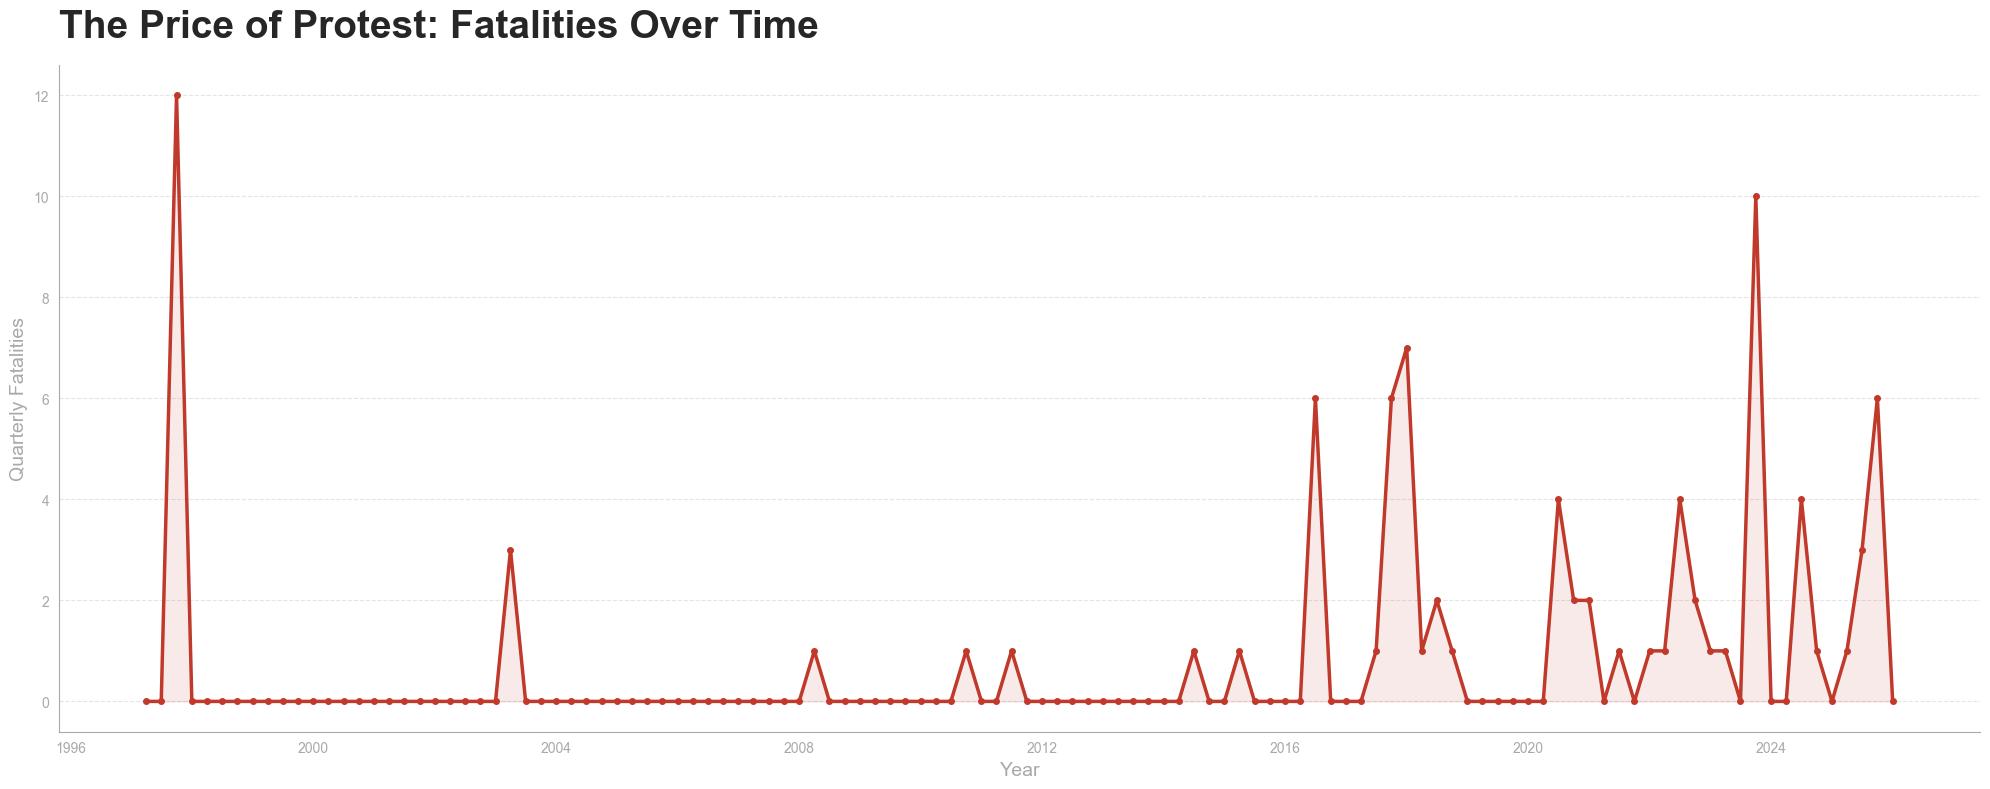

In [24]:
# Data Aggregation 
quarterly_fatalities = df_kenya.resample('QE')['fatalities'].sum()

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(quarterly_fatalities.index, quarterly_fatalities.values, 
        color=MAIN_RED, 
        lw=2.5, 
        marker='o', 
        markersize=4)
ax.fill_between(quarterly_fatalities.index, quarterly_fatalities.values, 
                color=MAIN_RED, 
                alpha=0.1)

# Styling
ax.set_title("The Price of Protest: Fatalities Over Time", 
             fontsize=28, fontweight='bold', loc='left', pad=20)
ax.grid(axis='y', linestyle='--', alpha=0.6, color=LIGHT_GREY)
ax.set_xlabel("Year", fontsize=14, color=NEUTRAL_GREY)
ax.set_ylabel("Quarterly Fatalities", fontsize=14, color=NEUTRAL_GREY)

sns.despine(ax=ax)
ax.spines['bottom'].set_color(NEUTRAL_GREY)
ax.spines['left'].set_color(NEUTRAL_GREY)
ax.tick_params(colors=NEUTRAL_GREY)

plt.tight_layout()
plt.savefig('graph3_fatalities.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Categorize protest drivers
def categorize_protest(notes_cell):
    notes_lower = str(notes_cell).lower()
    
    # Economic drivers
    if 'tax' in notes_lower or 'finance bill' in notes_lower or 'cost of living' in notes_lower or 'fuel' in notes_lower or 'budget' in notes_lower:
        return 'Economic (Tax/Finance)'
    
    # Political 
    if 'election' in notes_lower or 'poll' in notes_lower or 'iebc' in notes_lower or 'political' in notes_lower or 'opposition' in notes_lower:
        return 'Political (Elections)'
    
    return 'Other' 

# Category column
df_kenya['plot_category'] = df_kenya['notes'].apply(categorize_protest)


print(df_kenya['plot_category'].value_counts())

plot_category
Other                     5364
Economic (Tax/Finance)     550
Political (Elections)      427
Name: count, dtype: int64


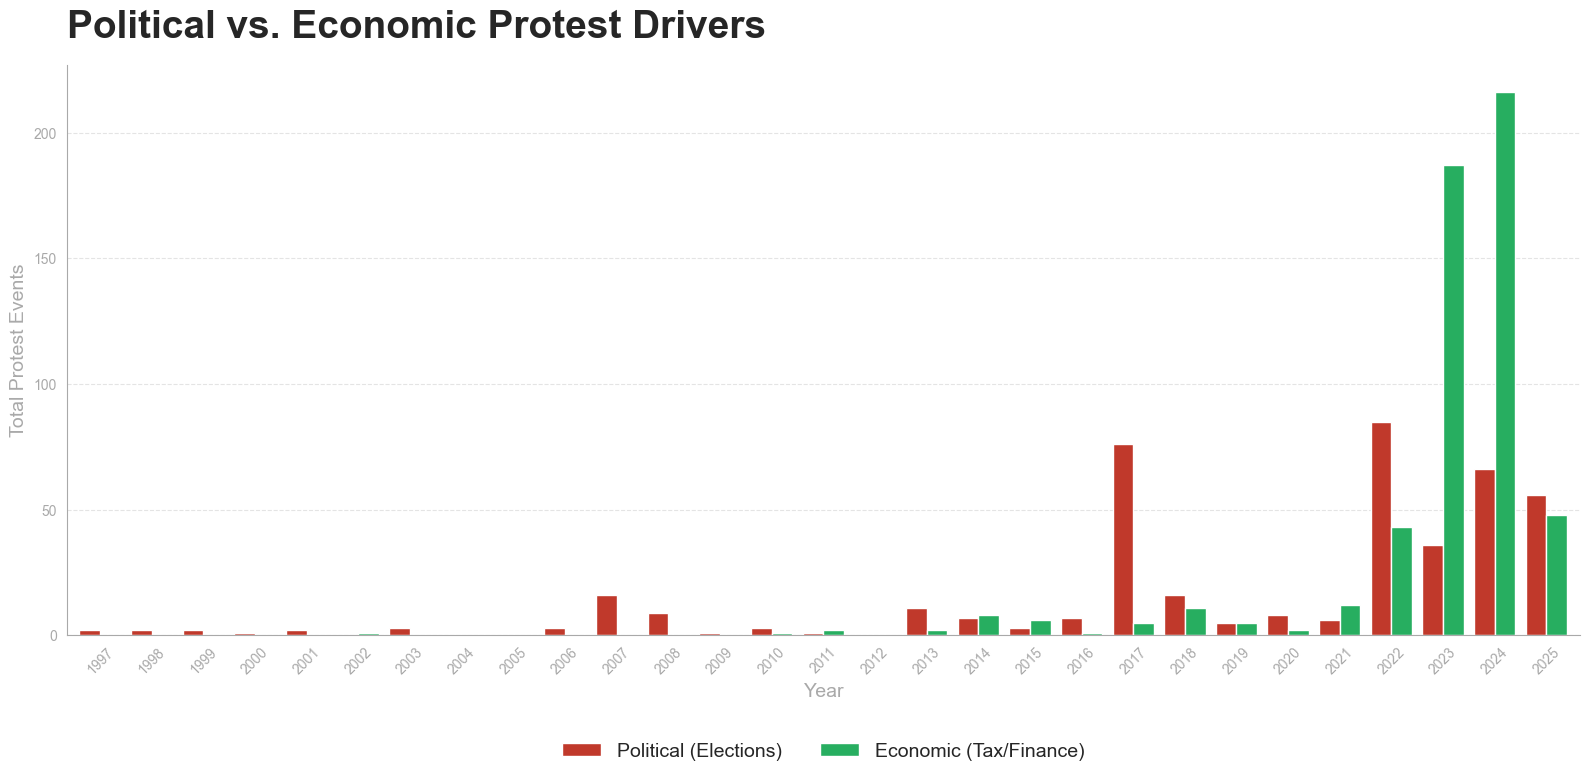

In [26]:
# Data Aggregation
# Group by year and category
df_agg = df_kenya.groupby(['year', 'plot_category'])['event_id_cnty'].count().unstack(fill_value=0)

# Reduce columns
categories_to_plot = ['Political (Elections)', 'Economic (Tax/Finance)']
cols_to_plot = [col for col in categories_to_plot if col in df_agg.columns]
df_plot = df_agg[cols_to_plot]


# Plot
fig, ax = plt.subplots(figsize=(16, 8))
df_plot.plot(kind='bar', ax=ax, 
             color=[MAIN_RED, MAIN_GREEN], 
             width=0.8)

# Styling
ax.set_title("Political vs. Economic Protest Drivers", 
             fontsize=28, fontweight='bold', loc='left', pad=20)
ax.grid(axis='y', linestyle='--', alpha=0.6, color=LIGHT_GREY)
ax.set_xlabel("Year", fontsize=14, color=NEUTRAL_GREY)
ax.set_ylabel("Total Protest Events", fontsize=14, color=NEUTRAL_GREY)

# Legend
ax.legend(title='', frameon=False, loc='lower center', 
          bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize=14)

plt.xticks(rotation=45)
sns.despine(ax=ax)
ax.spines['bottom'].set_color(NEUTRAL_GREY)
ax.spines['left'].set_color(NEUTRAL_GREY)
ax.tick_params(colors=NEUTRAL_GREY)

plt.tight_layout()
plt.savefig('graph4_aha_moments.png', dpi=300, bbox_inches='tight')
plt.show()

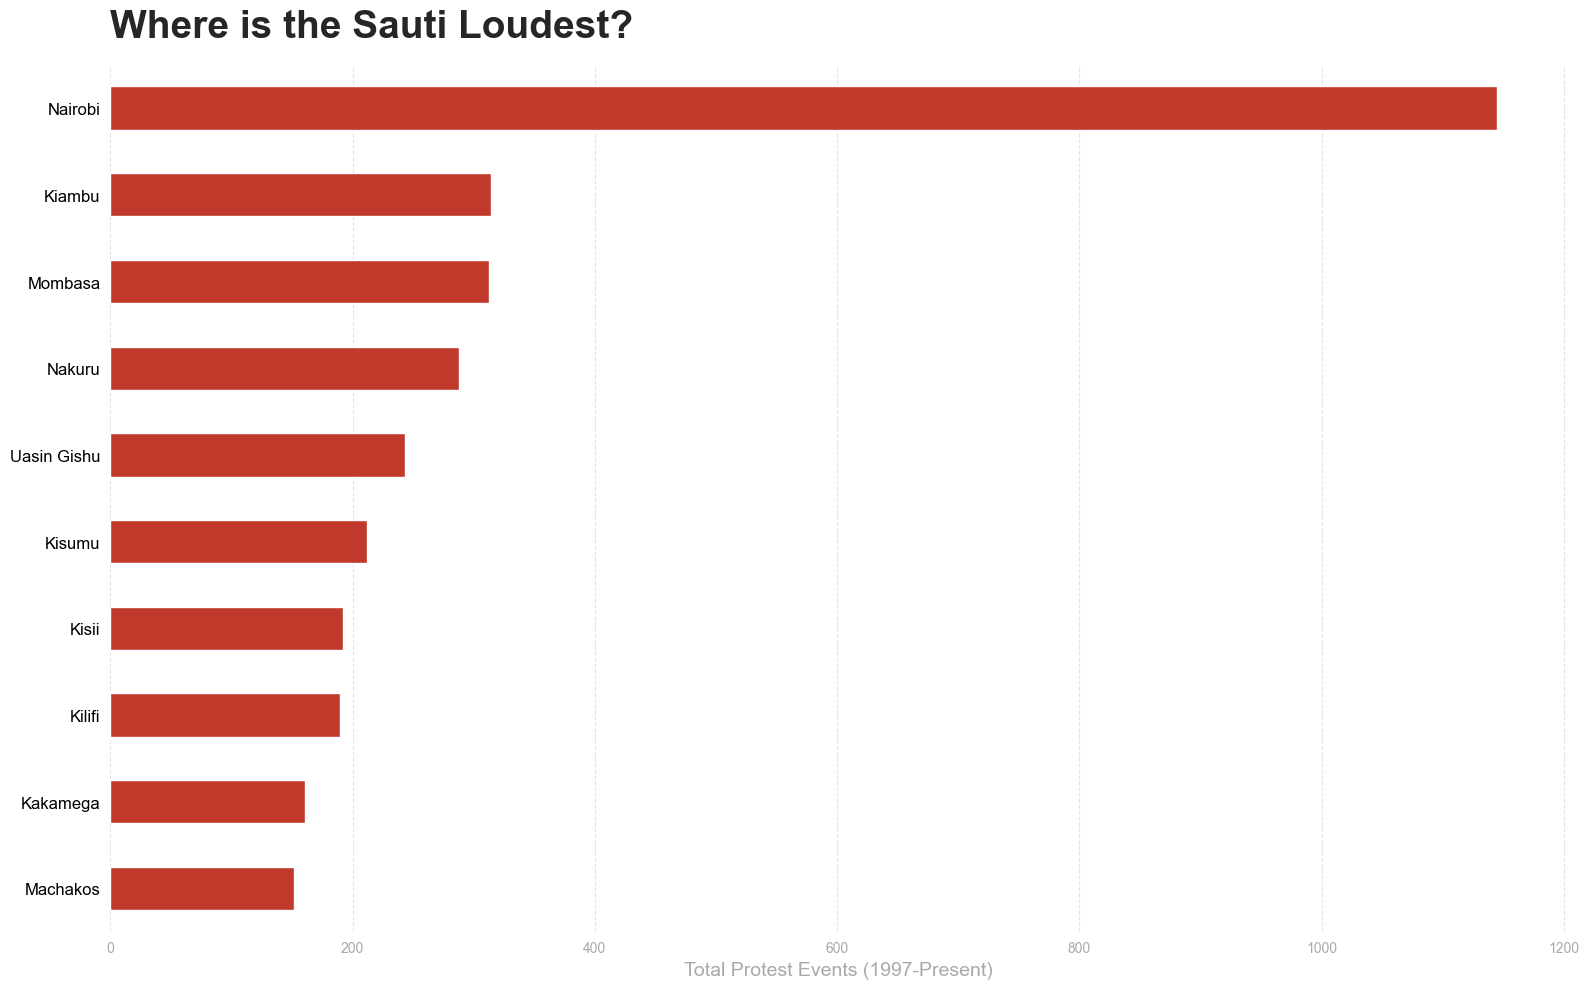

In [27]:
# Data Aggregation
county_protests = df_kenya.groupby('admin1')['event_id_cnty'].count().sort_values(ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Sort
county_protests.sort_values(ascending=True).plot(kind='barh', ax=ax, color=MAIN_RED)

# Styling
ax.set_title("Where is the Sauti Loudest?", 
             fontsize=28, fontweight='bold', loc='left', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.6, color=LIGHT_GREY)
ax.set_xlabel("Total Protest Events (1997-Present)", fontsize=14, color=NEUTRAL_GREY)
ax.set_ylabel("", fontsize=14, color=NEUTRAL_GREY) 

sns.despine(ax=ax, left=True, bottom=True)
ax.tick_params(colors=NEUTRAL_GREY, axis='x')
ax.tick_params(colors='black', axis='y', labelsize=12) 

plt.tight_layout()
plt.savefig('graph5_top_counties.png', dpi=300, bbox_inches='tight')
plt.show()

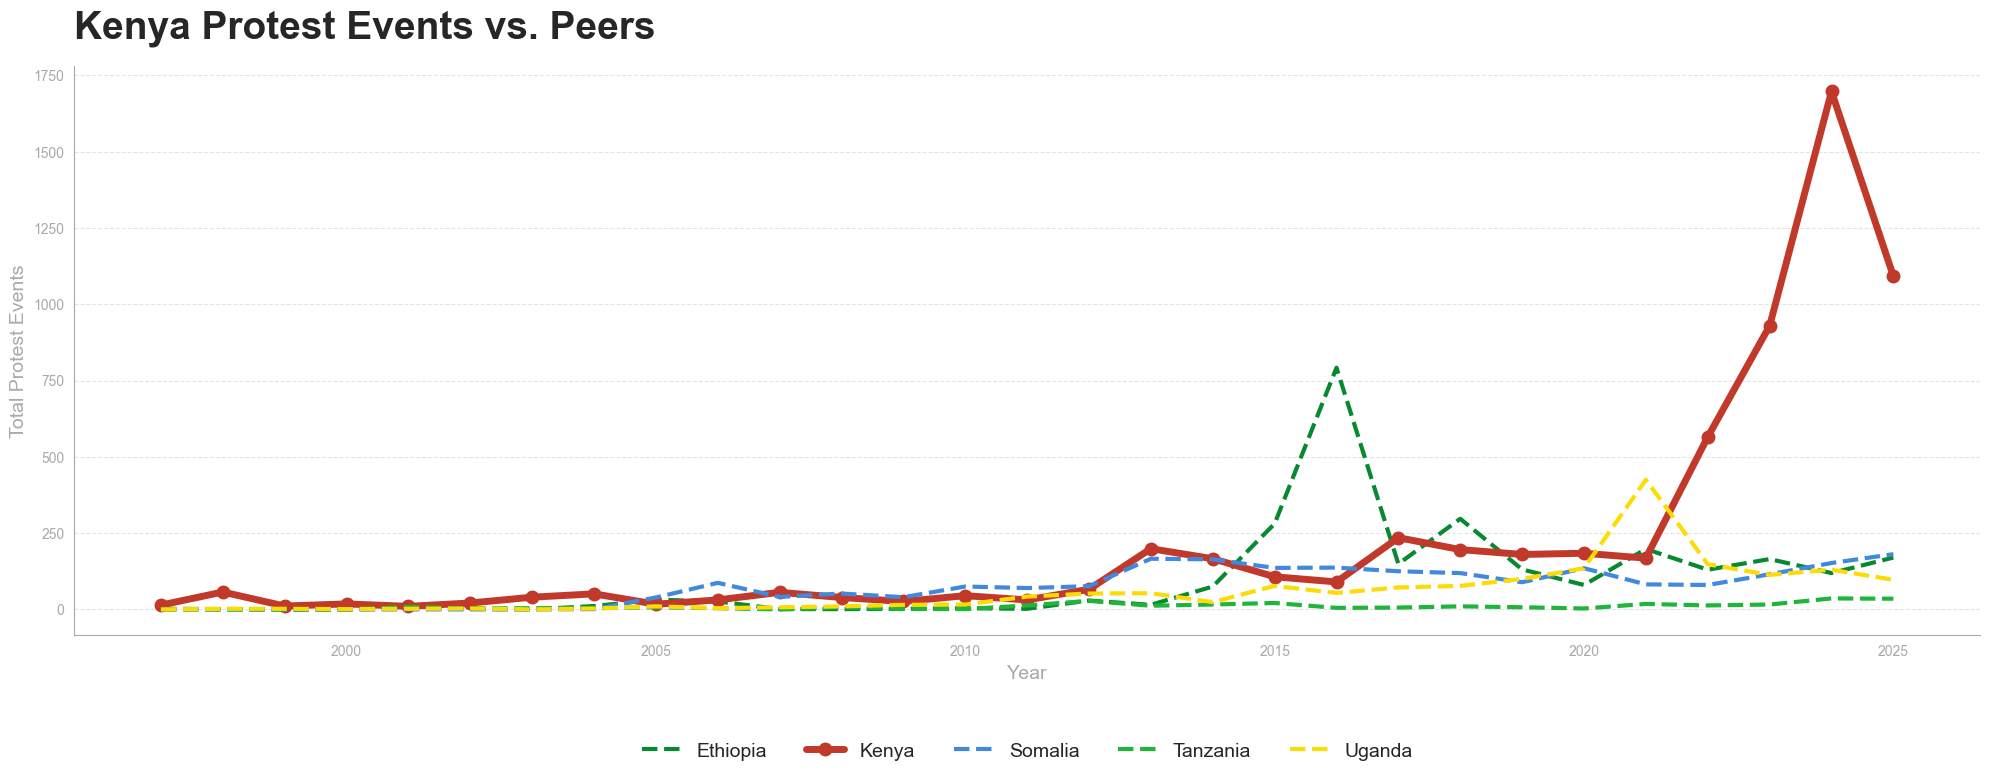

In [28]:
# Data Aggregation
# Group data by year and country, count events
yearly_peer_protests = df_protests.groupby(['year', 'country'])['event_id_cnty'].count().unstack().fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

# 
for country in yearly_peer_protests.columns:
    if country == 'Kenya':
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country], 
                color=MAIN_RED, 
                lw=5, 
                marker='o', 
                markersize=9, 
                label='Kenya')
    elif country == 'Uganda' :
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country], 
                color= '#FCDC04', 
                lw=3, 
                linestyle='--', 
                label=country)
    elif country == 'Somalia' :
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country], 
                color= '#4189DD', 
                lw=3, 
                linestyle='--', 
                label=country)
    elif country == 'Tanzania' :
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country], 
                color= '#1EB53A', 
                lw=3, 
                linestyle='--', 
                label=country)
    elif country == 'Ethiopia' :
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country], 
                color= '#078930', 
                lw=3, 
                linestyle='--', 
                label=country)             
    else:
        ax.plot(yearly_peer_protests.index, yearly_peer_protests[country], 
                color=NEUTRAL_GREY, 
                lw=2, 
                linestyle='--', 
                label=country)

# Styling
ax.set_title("Kenya Protest Events vs. Peers", 
             fontsize=28, fontweight='bold', loc='left', pad=20)
ax.grid(axis='y', linestyle='--', alpha=0.6, color=LIGHT_GREY)
ax.set_xlabel("Year", fontsize=14, color=NEUTRAL_GREY)
ax.set_ylabel("Total Protest Events", fontsize=14, color=NEUTRAL_GREY)

# Legend
ax.legend(title='', frameon=False, loc='lower center', 
          bbox_to_anchor=(0.5, -0.25), ncol=len(yearly_peer_protests.columns), fontsize=14)

sns.despine(ax=ax)
ax.spines['bottom'].set_color(NEUTRAL_GREY)
ax.spines['left'].set_color(NEUTRAL_GREY)
ax.tick_params(colors=NEUTRAL_GREY)

plt.tight_layout()
plt.savefig('graph6_peer_comparison.png', dpi=300, bbox_inches='tight')
plt.show()